# Results from the by-eye fitting of Sonora Bobcat-2018 Models

This notebook shows the results of by-eye fitting of synthetic data with the `gollum` tool.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from specutils import Spectrum1D
import pandas as pd
import astropy.units as u
%config InlineBackend.figure_format='retina'

Read in the results file with pandas:

In [10]:
df = pd.read_excel("../../data/tables/results.xlsx", header = 1 )

In [11]:
df

,lesson,specimen,Teff_lower,Teff,Teff_upper,logg_lower,logg,logg_upper,vsini_lower,vsini,vsini_upper,rv_lower,rv,rv_upper
0,A,1,1700,1900,2200,4.00,4.25,4.75,28.5,36.6,40.0,-26.30,-14.00,0.75
1,A,2,850,1150,1300,4.00,4.00,4.75,16.0,21.3,27.0,31.15,41.80,55.75
2,A,3,650,875,1200,5.00,5.50,5.50,0.1,4.4,12.5,-7.35,6.60,20.55
3,B,1,500,700,800,4.50,4.75,5.00,25.3,36.0,40.0,-62.30,-41.75,-23.80
4,B,2,1900,2100,2400,5.00,5.50,5.50,9.0,18.0,25.0,0.80,12.30,25.50
5,B,3,1600,1800,2100,4.00,4.25,4.50,4.0,26.3,35.0,-19.65,-4.95,6.55
6,C,1,1100,1675,1800,4.25,4.25,5.25,7.0,19.7,23.0,1.80,-3.25,17.35
7,C,2,1100,1400,1600,4.25,4.50,5.00,16.0,22.0,32.0,32.10,46.85,57.50
8,C,3,550,700,1100,4.25,4.75,5.00,36.0,40.0,40.0,-38.55,-23.00,-15.60


### Read in the True Values

In [14]:
df_truth = pd.read_excel("../../../ground-truth/data/tables/true_values.xlsx", header = 0 )

In [15]:
df_truth

,lesson,specimen,Teff,logg,vsini,RV
0,A,1,1900,4.25,36.7,-13.2
1,A,2,1100,4.00,21.7,43.2
2,A,3,850,5.50,4.7,7.2
3,B,1,700,4.75,42.0,-41.9
4,B,2,2100,5.25,13.3,12.1
5,B,3,1600,4.25,22.5,-5.9
6,C,1,1300,5.00,9.8,13.5
7,C,2,1400,4.50,25.2,51.1
8,C,3,750,4.50,60.8,-31.0


In [5]:
xerr1 = df.Teff - df.Teff_lower
xerr2 = df.Teff_upper - df.Teff

yerr1 = df.logg - df.logg_lower
yerr2 = df.logg_upper - df.logg

In [6]:
xerr = xerr1.values, xerr2.values
xerr = np.array(xerr)

yerr = yerr1.values, yerr2.values
yerr = np.array(yerr)

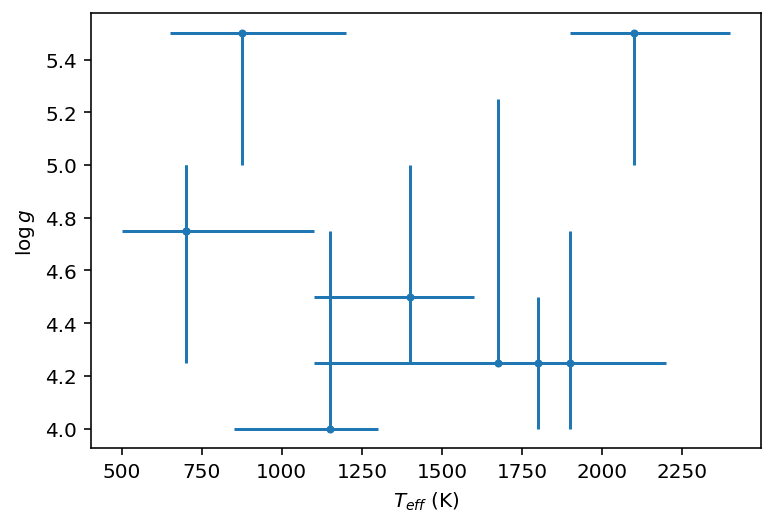

In [7]:
plt.errorbar(df.Teff, df.logg, xerr = xerr, yerr= yerr, 
             fmt = ".")
plt.ylabel("$\log{g}$")
plt.xlabel("$T_{eff}$ (K)");

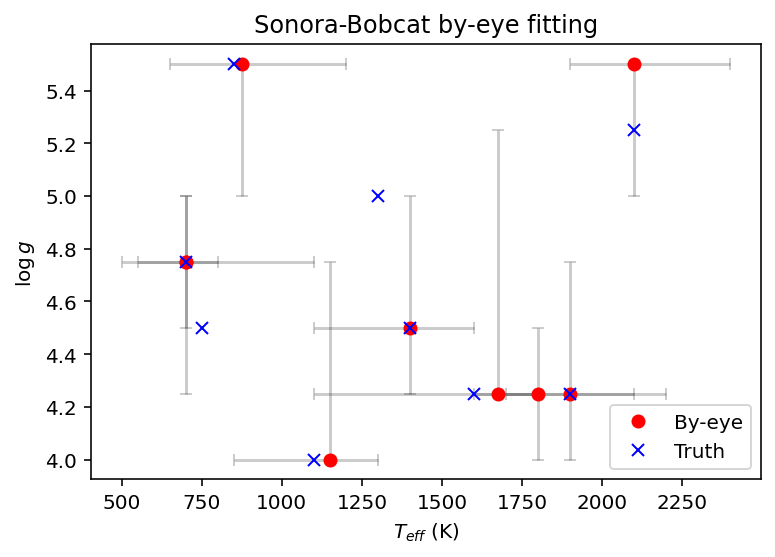

In [17]:
# plot the by-eye results
plt.errorbar(df.Teff, df.logg, xerr = xerr, yerr= yerr, 
             fmt = ".", alpha=0.2, color='black', 
             barsabove=True, capthick=1,capsize=3, 
             zorder=0)
plt.plot(df.Teff, df.logg, "o", alpha=1, color='red',zorder=1, label='By-eye')

# plot the True values
plt.plot(df_truth.Teff, df_truth.logg, 'x', color='blue', label='Truth')

plt.ylabel("$\log{g}$")
plt.xlabel("$T_{eff}$ (K)");
plt.title('Sonora-Bobcat by-eye fitting')
plt.legend()